# 🚲 DC Bikers Diary – Data Loading & Initial Exploration

This notebook is part of our group homework for the DC Bikers Diary Challenge. In this stage, we:

- Mount Google Drive to access the data.
- Load and inspect the first few datasets (trips, weather, stations, etc.).
- Ensure all files are accessible and preview a few rows for sanity checks.

📁 Data is stored in a shared Drive folder:  
`/My Drive/DC_Bikers_Diary_Homework/data/`

👤 Team Members:
- Shayma Almthiab
- Reham Shaaban
- Mayar Ajaj

In [ ]:
# # skip this if you're working locally
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## 📦 Install Required Libraries

This cell installs all the Python libraries needed for this notebook.  
⚠️ Note: In Google Colab, these installations need to be re-run each time the session restarts.

In [1]:
# !pip install numpy scipy pandas folium plotly scikit-learn jupyterlab
# # Install only if not already installed
# try:
#     import geopandas as gpd
#     import pygeohash
#     import prophet
# except:
#     !pip install geopandas pygeohash prophet pyarrow

## Imports

In [2]:
import os
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from scipy.spatial import KDTree
import numpy as np

## Setup Data Paths

In [4]:
# Define base data path
DATA_PATH = "data/"

# CSV Files
stations_file = os.path.join(DATA_PATH, "stations.csv")
weather_file = os.path.join(DATA_PATH, "weather_in_DC_2024.csv")
shuttle_bus_stops_file = os.path.join(DATA_PATH, "shuttle_bus_stops.csv")
metro_bus_stops_file = os.path.join(DATA_PATH, "metro_bus_stops.csv")
capital_bikeshare_locations_file = os.path.join(DATA_PATH, "capital_bikeshare_locations.csv")

# GeoJSON Files
residential_and_visitor_parking_zones_file = os.path.join(DATA_PATH, "residential_and_visitor_parking_zones.geojson")
DDOT_central_business_district_file = os.path.join(DATA_PATH, "DDOT_central_business_district.geojson")

# Parquet Files
daily_rent_file = os.path.join(DATA_PATH, "daily-rent.parquet")
daily_rent_sampled_file = os.path.join(DATA_PATH, "daily-rent-sampled.parquet")

In [3]:
# Define base data path
DATA_PATH = "clean_data/"

# CSV Files
stations_file = os.path.join(DATA_PATH, "stations.csv")
weather_file = os.path.join("data/", "weather_in_DC_2024.csv")
shuttle_bus_stops_file = os.path.join(DATA_PATH, "shuttle_bus_stops.csv")
metro_bus_stops_file = os.path.join(DATA_PATH, "metro_bus_stops.csv")
capital_bikeshare_locations_file = os.path.join(DATA_PATH, "capital_bikeshare.csv")

# GeoJSON Files
residential_file = os.path.join(DATA_PATH, "residential.geojson")
DDOT_central_business_district_file = os.path.join(DATA_PATH, "DDOT.geojson")

# Parquet Files
daily_rent_sampled_file = os.path.join(DATA_PATH, "daily_rent_sample.parquet")

## Load Data

In [4]:
# file path
shuttle_bus_stops_gdf_file = os.path.join(DATA_PATH, "shuttle_bus_stops.geojson")
metro_bus_stops_gdf_file = os.path.join(DATA_PATH, "metro_bus_stops.geojson")

# read
shuttle_bus_stops_gdf = gpd.read_file(shuttle_bus_stops_gdf_file)
metro_bus_stops_gdf = gpd.read_file(metro_bus_stops_gdf_file)

In [5]:
start_daily_file = os.path.join(DATA_PATH, "start_daily_rent_gdf.parquet")
start_daily_gdf = gpd.read_parquet(start_daily_file)

In [6]:
end_daily_file = os.path.join(DATA_PATH, "end_daily_rent_gdf.parquet")
end_daily_gdf = gpd.read_parquet(end_daily_file)

In [5]:
# CSV Files
stations_df = pd.read_csv(stations_file)
weather_df = pd.read_csv(weather_file)
shuttle_bus_stops_df = pd.read_csv(shuttle_bus_stops_file)
metro_bus_stops_df = pd.read_csv(metro_bus_stops_file)
capital_bikeshare_locations_df = pd.read_csv(capital_bikeshare_locations_file)

# GeoJSON Files
residential_and_visitor_parking_zones_gdf = gpd.read_file(residential_file)
DDOT_central_business_district_gdf = gpd.read_file(DDOT_central_business_district_file)

# Parquet Files
# daily_rent_df = pd.read_parquet(daily_rent_file)
daily_rent_sampled_df = pd.read_parquet(daily_rent_sampled_file)

## Helper Functions

In [6]:
def print_column_uniques(df, max_values=10):
    """
    Prints unique values and their counts for each column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to inspect.
        max_values (int): Max number of unique values to print per column.
    """
    for col in df.columns:
        print(f"\n🟦 Column: {col}")
        print("-" * (10 + len(col)))

        unique_vals = df[col].unique()
        num_unique = len(unique_vals)
        print(f"🔹 Unique values count: {num_unique}")

        if num_unique <= max_values:
            print(df[col].value_counts(dropna=False))
        else:
            print(df[col].value_counts(dropna=False).head(max_values))
            print("... (more values not shown)")

In [7]:
def get_missing_info(df):
    """
    Returns a DataFrame summarizing data types, number of missing values,
    and missing value ratios per column — for columns with missing values only.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        pd.DataFrame: Summary table with columns:
                      - data_type
                      - missing_val
                      - missing_val_ratio (as percentage)
                      Only includes columns where missing_val > 0.
    """
    info_df = pd.DataFrame(df.dtypes, columns=["data_type"])
    info_df['missing_val'] = df.isnull().sum()
    info_df['missing_val_ratio'] = (
        info_df['missing_val'] / len(df) * 100
    ).round().astype(int)

    # Only keep rows where there are missing values
    missing_info_df = info_df[info_df['missing_val'] > 0]

    return missing_info_df

## 👀 First Look at the Data

We inspect the first few rows of each dataset to:
- Verify successful loading.
- Understand column names and types.
- Check for obvious issues (e.g., nulls, strange formats).

In [12]:
print("📍 Stations:")
stations_df.head()

📍 Stations:


,id,name
0,30200,9th St & Pennsylvania Ave NW
1,30201,9th & G St NW
2,31000,Eads St & 15th St S
3,31002,Crystal Dr & 20th St S
4,31003,Crystal Dr & 15th St S


In [ ]:
stations_df.info()
stations_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      821 non-null    int64 
 1   name    821 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


(821, 2)

In [ ]:
print("🌤️ Weather:")
weather_df.head()

🌤️ Weather:


,name,datetime,tempmax,tempmin,temp,humidity,windspeed,windspeedmax,windspeedmean,windspeedmin,cloudcover,sunrise,sunset,moonphase,conditions,description,icon
0,"Washington,DC,USA",2024-01-01,6.1,3.8,4.9,74.7,21.9,21.9,11.9,0.0,90.3,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain
1,"Washington,DC,USA",2024-01-02,7.7,2.0,4.7,57.3,29.2,29.2,18.6,6.7,47.5,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
2,"Washington,DC,USA",2024-01-03,8.8,0.9,4.4,59.5,14.2,14.2,8.9,0.7,68.7,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
3,"Washington,DC,USA",2024-01-04,8.1,0.7,4.7,55.2,35.0,35.0,17.0,0.0,68.5,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
4,"Washington,DC,USA",2024-01-05,4.4,-2.4,0.9,55.0,21.3,21.3,10.6,5.1,44.5,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day


In [ ]:
weather_df.info()
weather_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           366 non-null    object 
 1   datetime       366 non-null    object 
 2   tempmax        366 non-null    float64
 3   tempmin        366 non-null    float64
 4   temp           366 non-null    float64
 5   humidity       366 non-null    float64
 6   windspeed      366 non-null    float64
 7   windspeedmax   366 non-null    float64
 8   windspeedmean  366 non-null    float64
 9   windspeedmin   366 non-null    float64
 10  cloudcover     366 non-null    float64
 11  sunrise        366 non-null    object 
 12  sunset         366 non-null    object 
 13  moonphase      366 non-null    float64
 14  conditions     366 non-null    object 
 15  description    366 non-null    object 
 16  icon           366 non-null    object 
dtypes: float64(10), object(7)
memory usage: 48.7+ KB


(366, 17)

In [13]:
print("🚲 Shuttle Bus Stops:")
shuttle_bus_stops_df.head()

🚲 Shuttle Bus Stops:


,X,Y,COMPANY,ADDRESS,ATTRACTION,CROSSROADS,METERS,METRO_BUS_ZONE,METRO_STOP_ID,OTHER,...,YCOORD,LATITUDE,LONGITUDE,SE_ANNO_CAD_DATA,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID
0,-8.581105e+06,4.715777e+06,Reston Limousine,4350 JENIFER STREET NW,Mazza Gallarie,"4350 Jennifer St. NW, Washington, DC 20015 (pi...",No,No,NaN,No,...,143439.120000,38.958828,-77.085372,NaN,{4D096877-4394-4E04-AAC7-BC4E511C5B4A},NaN,NaN,DCGIS,2018/01/08 22:11:18+00,1
1,-8.571861e+06,4.714828e+06,Reston Limousine,550 GALLOWAY STREET NE,NaN,"550 Galloway St. NE, Washington, DC 20011 - Fo...",No,No,NaN,NaN,...,142700.050000,38.952201,-77.002336,NaN,{86FD8D0D-8512-4B67-BC46-F4702DDECBF7},NaN,NaN,DCGIS,2018/01/08 22:11:18+00,2
2,-8.580446e+06,4.714237e+06,American University,TENLEYTOWN - AU METRO STATION ENTRANCE - NORTH...,Tenley Town Metro,Albermarle St & 40th Street NW,No,Yes,1002492,No,...,142244.710000,38.948072,-77.079460,NaN,{39D07F3C-F0BC-4A81-A48E-B84F4476C0FB},NaN,NaN,DCGIS,2018/01/08 22:11:18+00,3
3,-8.580342e+06,4.714213e+06,American University,FORT DRIVE NW AND ALBEMARLE STREET NW,Metro on Fort road,Fort Drive & Albemarle St,No,Yes,1002498,No,...,142225.640001,38.947901,-77.078521,NaN,{F5F56BB9-4FA5-4990-A245-49BD5CE9FF56},NaN,NaN,DCGIS,2018/01/08 22:12:45+00,4
4,-8.580407e+06,4.713930e+06,American University,NEBRASKA AVENUE NW AND TENLEY CIRCLE NW,Tenley campus to Main Campus,Nebraska Ave NW & Tenley Circle,No,Yes,1003488,No,...,142006.200001,38.945924,-77.079102,NaN,{81C0AAA8-0A4A-46DB-B21F-290E8C261FB4},NaN,NaN,DCGIS,2018/01/08 22:12:45+00,5


In [14]:
shuttle_bus_stops_df.columns

Index(['X', 'Y', 'COMPANY', 'ADDRESS', 'ATTRACTION', 'CROSSROADS', 'METERS',
       'METRO_BUS_ZONE', 'METRO_STOP_ID', 'OTHER', 'NPS', 'NUM_SHARED_OPER',
       'RUSH_HOUR_RESTR', 'LZ_HOTEL_OR_COMM', 'SPACE_LOC_ON_BLOCK',
       'NO_STOP_NO_STAND_AREA', 'MAR_ID', 'GIS_ID', 'XCOORD', 'YCOORD',
       'LATITUDE', 'LONGITUDE', 'SE_ANNO_CAD_DATA', 'GLOBALID', 'CREATOR',
       'CREATED', 'EDITOR', 'EDITED', 'OBJECTID'],
      dtype='object')

In [15]:
shuttle_bus_stops_df.info()
shuttle_bus_stops_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X                      102 non-null    float64
 1   Y                      102 non-null    float64
 2   COMPANY                102 non-null    object 
 3   ADDRESS                102 non-null    object 
 4   ATTRACTION             76 non-null     object 
 5   CROSSROADS             84 non-null     object 
 6   METERS                 95 non-null     object 
 7   METRO_BUS_ZONE         93 non-null     object 
 8   METRO_STOP_ID          23 non-null     object 
 9   OTHER                  77 non-null     object 
 10  NPS                    0 non-null      float64
 11  NUM_SHARED_OPER        102 non-null    int64  
 12  RUSH_HOUR_RESTR        95 non-null     object 
 13  LZ_HOTEL_OR_COMM       95 non-null     object 
 14  SPACE_LOC_ON_BLOCK     93 non-null     object 
 15  NO_STO

(102, 29)

In [16]:
print("🚲 Metro Bus Stops:")
metro_bus_stops_df.head()

🚲 Metro Bus Stops:


,X,Y,EGIS_ID,REG_ID,BSTP_GEO_ID,BSTP_OPS_TCD,BSTP_EFF_DATE,BSTP_TCD,AT_STR,ON_STR,...,SE_ANNO_CAD_DATA,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,SNOWPRIORITY,BSTP_OPS_FTU_TCD,MSTN_ID
0,-8.581259e+06,4.715817e+06,1311739,1003448,15663,PRS,2011/08/22 04:00:00+00,UNK,44TH ST NW,JENIFER ST NW,...,NaN,{CFF25BD1-E9E8-44CD-81D6-975FE646753F},JLAY,2024/01/19 02:55:48+00,JLAY,2024/01/19 02:55:48+00,54845,NaN,NON,NaN
1,-8.540493e+06,4.714288e+06,1310541,3003035,14833,PRS,2001/12/30 05:00:00+00,REV,HARBOUR WAY,MITCHELLVILLE RD,...,NaN,{8E670BA7-FB63-4CAC-B9FC-C0901E266303},JLAY,2024/01/19 02:55:48+00,JLAY,2024/01/19 02:55:48+00,54846,NaN,NON,NaN
2,-8.591135e+06,4.698290e+06,1302469,5000849,2134,PRS,1901/01/01 05:00:00+00,REV,SLEEPY HOLLOW MANOR,COLUMBIA PIKE,...,NaN,{22649B1B-617C-4511-9786-D465C7142788},JLAY,2024/01/19 02:55:48+00,JLAY,2024/01/19 02:55:48+00,54847,NaN,NON,NaN
3,-8.577431e+06,4.682321e+06,1305286,5001858,11889,PRS,1974/11/25 05:00:00+00,REV,CUSHMAN PL,WAYNEWOOD BLVD,...,NaN,{AE0E1A3F-7C1D-4410-9E47-01B20568BBE0},JLAY,2024/01/19 02:55:48+00,JLAY,2024/01/19 02:55:48+00,54848,NaN,NON,NaN
4,-8.578561e+06,4.680594e+06,1305279,5001885,11919,PRS,1901/01/01 05:00:00+00,REV,PRICES LN,VERNON VIEW DR,...,NaN,{2C8845FF-D723-4334-A3DD-4DFEA1B1C4C2},JLAY,2024/01/19 02:55:48+00,JLAY,2024/01/19 02:55:48+00,54849,NaN,NON,NaN


In [17]:
metro_bus_stops_df.columns

Index(['X', 'Y', 'EGIS_ID', 'REG_ID', 'BSTP_GEO_ID', 'BSTP_OPS_TCD',
       'BSTP_EFF_DATE', 'BSTP_TCD', 'AT_STR', 'ON_STR', 'BSTP_HDG',
       'BSTP_POS_TCD', 'BSTP_LDC', 'BSTP_MSG_TEXT', 'BSTP_LON', 'BSTP_LAT',
       'BSTP_LAT_LON_TCD', 'BSTP_INV_SYR_TCD', 'BSTP_INV_SRV_DATE',
       'BSTP_BNH_CNT', 'BSTP_BST_TCD', 'BSTP_IFC_OWN', 'BSTP_HAS_BKRS',
       'BSTP_HAS_PRS', 'BSTP_HAS_PVM', 'BSTP_HAS_PRM', 'BSTP_PDP_SIZE_TCD',
       'BSTP_PDP_MTR_TCD', 'BSTP_PDP_OBS_TCD', 'BSTP_PDP_HAS_CCN',
       'BSTP_HAS_BDR_PDP', 'BSTP_BDR_PDP_OBS', 'BSTP_SWK_WDT',
       'BSTP_SWK_HAS_CCN', 'BSTP_SWK_HAS_PPC', 'BSTP_SWK_SLP_WVL',
       'BSTP_SWK_OBS_TCD', 'BSTP_SWK_IPD_TCD', 'ONS_CRP_SLP', 'ONS_CRP',
       'OFS_CRP', 'AT_STR_ABS_CRP', 'AT_STR_OSS_CRP', 'ONS_CWK', 'OFS_CWK',
       'AT_STR_ABS_CWK', 'AT_STR_OSS_CWK', 'ON_STR_STS_OR_TFL',
       'ON_STR_PDC_SGL', 'AT_STR_PDC_SGL', 'BSTP_PRK_RST_TCD',
       'BSTP_NPK_ZNE_LTH', 'CNF_NPK_SNS', 'STR_LGT_WTN_30_FT',
       'BSTP_HAS_LED_DSP', 'BSTP_AC

In [18]:
metro_bus_stops_df.info()
metro_bus_stops_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  10044 non-null  float64
 1   Y                  10044 non-null  float64
 2   EGIS_ID            10044 non-null  int64  
 3   REG_ID             10044 non-null  int64  
 4   BSTP_GEO_ID        10044 non-null  int64  
 5   BSTP_OPS_TCD       10044 non-null  object 
 6   BSTP_EFF_DATE      10044 non-null  object 
 7   BSTP_TCD           10044 non-null  object 
 8   AT_STR             10044 non-null  object 
 9   ON_STR             10044 non-null  object 
 10  BSTP_HDG           10044 non-null  int64  
 11  BSTP_POS_TCD       10044 non-null  object 
 12  BSTP_LDC           9768 non-null   object 
 13  BSTP_MSG_TEXT      10044 non-null  object 
 14  BSTP_LON           10044 non-null  float64
 15  BSTP_LAT           10044 non-null  float64
 16  BSTP_LAT_LON_TCD   481

(10044, 79)

In [ ]:
print("🚲 Capital Bikeshare Locations:")
capital_bikeshare_locations_df.head()

In [ ]:
capital_bikeshare_locations_df.columns

Index(['X', 'Y', 'NAME', 'STATION_TYPE', 'STATION_ID', 'STATION_STATUS',
       'LAST_REPORTED', 'NUM_DOCKS_AVAILABLE', 'NUM_DOCKS_DISABLED',
       'NUM_BIKES_AVAILABLE', 'NUM_EBIKES_AVAILABLE', 'NUM_BIKES_DISABLED',
       'IS_INSTALLED', 'IS_RETURNING', 'IS_RENTING', 'HAS_KIOSK', 'IOS',
       'ANDROID', 'ELECTRIC_BIKE_SURCHARGE_WAIVER', 'EIGHTD_HAS_KEY_DISPENSER',
       'CAPACITY', 'RENTAL_METHODS', 'REGION_ID', 'REGION_NAME', 'GIS_ID',
       'LATITUDE', 'LONGITUDE', 'GIS_LAST_MOD_DTTM', 'OBJECTID'],
      dtype='object')

In [ ]:
capital_bikeshare_locations_df.info()
capital_bikeshare_locations_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   X                               794 non-null    float64
 1   Y                               794 non-null    float64
 2   NAME                            794 non-null    object 
 3   STATION_TYPE                    794 non-null    object 
 4   STATION_ID                      794 non-null    object 
 5   STATION_STATUS                  0 non-null      float64
 6   LAST_REPORTED                   794 non-null    object 
 7   NUM_DOCKS_AVAILABLE             794 non-null    int64  
 8   NUM_DOCKS_DISABLED              794 non-null    int64  
 9   NUM_BIKES_AVAILABLE             794 non-null    int64  
 10  NUM_EBIKES_AVAILABLE            794 non-null    int64  
 11  NUM_BIKES_DISABLED              794 non-null    int64  
 12  IS_INSTALLED                    794 

(794, 29)

In [ ]:
print("🚲 Residential And Visitor Parking Zones:")
residential_and_visitor_parking_zones_gdf.head()

🚲 Residential And Visitor Parking Zones:


,NAME,RPP_ZONE,ANC_ID,WEB_URL,GIS_ID,SHAPE_LENG,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,SHAPEAREA,SHAPELEN,geometry
0,ANC 4A,4,4A,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_17,19149.358478,None,None,None,None,1,0,0,"POLYGON ((-77.03331 38.98999, -77.03332 38.99,..."
1,ANC 3G,3,3G,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_16,13274.053932,None,None,None,None,2,0,0,"POLYGON ((-77.05161 38.98615, -77.05181 38.986..."
2,ANC 4B,4,4B,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_10,10937.574323,None,None,None,None,3,0,0,"POLYGON ((-76.99908 38.96328, -76.99909 38.963..."
3,ANC 3F,3,3F,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_15,11804.927060,None,None,None,None,4,0,0,"POLYGON ((-77.04702 38.96038, -77.04722 38.960..."
4,ANC 4C,4,4C,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_7,9774.918003,None,None,None,None,5,0,0,"POLYGON ((-77.02803 38.95622, -77.02804 38.956..."


In [ ]:
residential_and_visitor_parking_zones_gdf.columns

Index(['NAME', 'RPP_ZONE', 'ANC_ID', 'WEB_URL', 'GIS_ID', 'SHAPE_LENG',
       'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'OBJECTID', 'SHAPEAREA',
       'SHAPELEN', 'geometry'],
      dtype='object')

In [ ]:
residential_and_visitor_parking_zones_gdf.info()
residential_and_visitor_parking_zones_gdf.shape

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        40 non-null     object  
 1   RPP_ZONE    40 non-null     int32   
 2   ANC_ID      40 non-null     object  
 3   WEB_URL     40 non-null     object  
 4   GIS_ID      40 non-null     object  
 5   SHAPE_LENG  40 non-null     float64 
 6   CREATOR     0 non-null      object  
 7   CREATED     0 non-null      object  
 8   EDITOR      0 non-null      object  
 9   EDITED      0 non-null      object  
 10  OBJECTID    40 non-null     int32   
 11  SHAPEAREA   40 non-null     int32   
 12  SHAPELEN    40 non-null     int32   
 13  geometry    40 non-null     geometry
dtypes: float64(1), geometry(1), int32(4), object(8)
memory usage: 3.9+ KB


(40, 14)

In [ ]:
print("🚲 DDOT Central Business Distric:")
DDOT_central_business_district_gdf.head()

🚲 DDOT Central Business Distric:


,OBJECTID,ID,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,1,0,DDOT_CBD_1,{88E0BE6C-77A4-4C9B-96DA-39C3D223AA41},None,None,None,None,0,0,"POLYGON ((-77.05028 38.91194, -77.05029 38.911..."


In [ ]:
DDOT_central_business_district_gdf.columns

Index(['OBJECTID', 'ID', 'GIS_ID', 'GLOBALID', 'CREATOR', 'CREATED', 'EDITOR',
       'EDITED', 'SHAPEAREA', 'SHAPELEN', 'geometry'],
      dtype='object')

In [ ]:
DDOT_central_business_district_gdf.info()
DDOT_central_business_district_gdf.shape

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   1 non-null      int32   
 1   ID         1 non-null      int32   
 2   GIS_ID     1 non-null      object  
 3   GLOBALID   1 non-null      object  
 4   CREATOR    0 non-null      object  
 5   CREATED    0 non-null      object  
 6   EDITOR     0 non-null      object  
 7   EDITED     0 non-null      object  
 8   SHAPEAREA  1 non-null      int32   
 9   SHAPELEN   1 non-null      int32   
 10  geometry   1 non-null      geometry
dtypes: geometry(1), int32(4), object(6)
memory usage: 204.0+ bytes


(1, 11)

In [ ]:
print("🚲 Daily Rent:")
daily_rent_df.head()

🚲 Daily Rent:


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,748A93D7DE8A41CD,classic_bike,2024-01-25 15:49:59,2024-01-25 15:52:35,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,38.903819,-77.011987,member
1,75CBFD136F06305B,classic_bike,2024-01-02 16:44:58,2024-01-02 16:53:25,1st & O St NW,31519,4th & College St NW,31138,38.908643,-77.012365,38.921233,-77.018135,member
2,0536C9720F87E04C,classic_bike,2024-01-24 15:40:15,2024-01-24 15:43:55,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,38.903819,-77.011987,member
3,9E17390C218783B5,classic_bike,2024-01-04 15:35:00,2024-01-04 15:37:35,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,38.903819,-77.011987,member
4,00727D0E773CDFF7,electric_bike,2024-01-05 12:27:58,2024-01-05 12:35:40,1st & O St NW,31519,10th & G St NW,31274,38.908690,-77.012317,38.898243,-77.026235,casual


In [ ]:
daily_rent_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
daily_rent_df.info()
daily_rent_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114323 entries, 0 to 6114322
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       string        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  string        
 5   start_station_id    string        
 6   end_station_name    string        
 7   end_station_id      string        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       string        
dtypes: datetime64[ns](2), float64(4), string(7)
memory usage: 606.4 MB


(6114323, 13)

In [ ]:
print("🚲 Daily Rent Sampled:")
daily_rent_sampled_df.head()

🚲 Daily Rent Sampled:


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6A6067934F2E1EC9,classic_bike,2024-05-04 14:27:37,2024-05-04 14:37:52,14th & G St NW,31238,Jefferson Memorial,31249,38.898164,-77.031898,38.879819,-77.037413,casual
1,FF5D6FE256D4DE34,classic_bike,2024-05-04 14:00:53,2024-05-04 15:00:25,Jefferson Dr & 14th St SW,31247,7th & F St NW / National Portrait Gallery,31232,38.888553,-77.032427,38.897283,-77.022191,casual
2,4A64EABCDCB7506A,classic_bike,2024-05-04 15:12:21,2024-05-04 15:27:29,1st & M St NE,31603,4th & M St SW,31108,38.905697,-77.005483,38.876823,-77.017774,casual
3,0F7347CF6409CEB7,classic_bike,2024-05-04 14:49:59,2024-05-04 14:54:11,Jefferson Memorial,31249,Hains Point/Buckeye & Ohio Dr SW,31273,38.879819,-77.037413,38.878433,-77.030230,casual
4,2022D12F38B197C3,classic_bike,2024-05-04 19:23:20,2024-05-04 19:41:35,New Hampshire Ave & T St NW,31229,14th & G St NW,31238,38.915544,-77.038252,38.898164,-77.031898,casual


In [ ]:
daily_rent_sampled_df.shape

(2018456, 13)

# 1.1 Let's Clean Up Some Data!

We'll start by preprocessing the data: checking for and handling missing values

## **1. Shuttle Bus Stops Dataset**

starting off with the **Shuttle Bus Stops Dataset**, since the stations and weather datasets don't have any missing values per the initial inspection, they're safe (for now)

- ***Purpose of the dataset*** : Pickup and drop off locations for shuttle buses operated by sight seeing, ride share and educational organizations.

### Step 1:🧹 Let's starting by dropping totally useless columns

In [7]:
# let's check for missing values in-depth
missing_info = get_missing_info(shuttle_bus_stops_df)
display(missing_info.sort_values("missing_val_ratio", ascending=False))

,data_type,missing_val,missing_val_ratio
NPS,float64,102,100
SE_ANNO_CAD_DATA,float64,102,100
CREATOR,float64,102,100
CREATED,float64,102,100
METRO_STOP_ID,object,79,77
ATTRACTION,object,26,25
OTHER,object,25,25
CROSSROADS,object,18,18
METRO_BUS_ZONE,object,9,9
SPACE_LOC_ON_BLOCK,object,9,9


In [8]:
# First: Dropping all NULL coulmns
cols_100_nulls = [
    "NPS", "SE_ANNO_CAD_DATA", "CREATOR", "CREATED"
]
shuttle_bus_stops_df.drop(columns=cols_100_nulls, inplace=True)

In [9]:
print_column_uniques(shuttle_bus_stops_df)


🟦 Column: X
-----------
🔹 Unique values count: 96
X
-8.576568e+06    2
-8.580407e+06    2
-8.577218e+06    2
-8.580930e+06    2
-8.581164e+06    2
-8.577422e+06    2
-8.572513e+06    1
-8.576098e+06    1
-8.572323e+06    1
-8.574517e+06    1
Name: count, dtype: int64
... (more values not shown)

🟦 Column: Y
-----------
🔹 Unique values count: 96
Y
4.708923e+06    2
4.713930e+06    2
4.707483e+06    2
4.713135e+06    2
4.712783e+06    2
4.710917e+06    2
4.707092e+06    1
4.706883e+06    1
4.706889e+06    1
4.706896e+06    1
Name: count, dtype: int64
... (more values not shown)

🟦 Column: COMPANY
-----------------
🔹 Unique values count: 25
COMPANY
Reston Limousine              30
CitySights DC                 14
American University           11
International Limousine        9
Georgetown University          6
Abe's Transportation Inc.      4
Open Top                       3
Open Top                       3
Chariots for Hire              3
Old Town & Open Top            2
Name: count, dt

after further inspection, we will be dropping these following columns as well ! (all of them are either ID columns or contain no relevant or meaningful info)


| Column     | Reason to Drop                                                 |
| ---------- | -------------------------------------------------------------- |
| `OBJECTID` | Just a row index in the GIS system (not meaningful)            |
| `GLOBALID` | Globally unique ID, useful in syncing GIS systems: not needed |
| `EDITOR`   | Always `"DCGIS"` no variation → no value                     |
| `EDITED`   | Timestamps only   |
| `GIS_ID`   | Same as `OBJECTID`, different format                           |
| `MAR_ID`   | Internal map registry ID (used by DC gov, not us)             |


In [10]:
# Second : let's drop useless obvious useless columns
columns_to_drop = ["OBJECTID", "GLOBALID", "EDITOR", "EDITED", "GIS_ID", "MAR_ID"]
shuttle_bus_stops_df.drop(columns=columns_to_drop, inplace=True)

shuttle_bus_stops_df.head()

,X,Y,COMPANY,ADDRESS,ATTRACTION,CROSSROADS,METERS,METRO_BUS_ZONE,METRO_STOP_ID,OTHER,NUM_SHARED_OPER,RUSH_HOUR_RESTR,LZ_HOTEL_OR_COMM,SPACE_LOC_ON_BLOCK,NO_STOP_NO_STAND_AREA,XCOORD,YCOORD,LATITUDE,LONGITUDE
0,-8.581105e+06,4.715777e+06,Reston Limousine,4350 JENIFER STREET NW,Mazza Gallarie,"4350 Jennifer St. NW, Washington, DC 20015 (pi...",No,No,NaN,No,1,No,Yes,Eastbound/Rightside,Yes,392600.610000,143439.120000,38.958828,-77.085372
1,-8.571861e+06,4.714828e+06,Reston Limousine,550 GALLOWAY STREET NE,NaN,"550 Galloway St. NE, Washington, DC 20011 - Fo...",No,No,NaN,NaN,1,No,No,Eastbound / Rightside,No,399797.550000,142700.050000,38.952201,-77.002336
2,-8.580446e+06,4.714237e+06,American University,TENLEYTOWN - AU METRO STATION ENTRANCE - NORTH...,Tenley Town Metro,Albermarle St & 40th Street NW,No,Yes,1002492,No,1,No,No,Southbound/Right side,No,393111.980000,142244.710000,38.948072,-77.079460
3,-8.580342e+06,4.714213e+06,American University,FORT DRIVE NW AND ALBEMARLE STREET NW,Metro on Fort road,Fort Drive & Albemarle St,No,Yes,1002498,No,1,No,No,Northbound/ Right Side,No,393193.339992,142225.640001,38.947901,-77.078521
4,-8.580407e+06,4.713930e+06,American University,NEBRASKA AVENUE NW AND TENLEY CIRCLE NW,Tenley campus to Main Campus,Nebraska Ave NW & Tenley Circle,No,Yes,1003488,No,1,No,No,Southwest bound/Rightside,No,393142.779992,142006.200001,38.945924,-77.079102


###  Step 2 :🧹 Handling Missing Values

Several columns in this dataset contain missing or unclear values (NaNs or "?")
Since the dataset is very small already, so we won't be dropping any rows!
  
**1.`ATTRACTION`** (25% missing)
--> we will be replacing them with "None" -- as in there are no nearby landmarks or points of interest.

**2.`CROSSROADS`** (18% missing)
--> we will be replacing them with "Unknown" -- we don't know the nearest intersecting streets or junction.

**3. `OTHER`** (25% missing)
--> we will be replacing them with "None" -- as in there are no additional notes about the stop.

**4. `METRO_STOP_ID`** (77% missing)
--> *for now* we will replace them with "None"
--> This column might be useful later if we join it with a Metro dataset for spatial analysis. Otherwise, we may drop it.

**5. `METRO_BUS_ZONE`** (9% missing)
--> will be replaced with "Unknown", we don't know whether this is a metro stop zone or not.

**6. `METERS`** (7% missing)
--> Replaced with "Unknown".  
📝 The meaning of this column is unclear; we retain it in case it becomes relevant later.

**7. `RUSH_HOUR_RESTR`** (7% missing)
--> will be replaced with "No Info", we don't know whether this bus stop has a rush hour restriction or not.

**8. `LZ_HOTEL_OR_COMM`** (7% missing)
--> will be replaced with "No Info", we don't know whether this bus stop is in a hotel or comm zone.

**9. `SPACE_LOC_ON_BLOCK`** (9% missing)
--> will be replaced with "No Info"
--> We may be able to **derive this spatially** later (from direction or street geometry). Also needs text normalization.

**10. `NO_STOP_NO_STAND_AREA`** (8% missing)
--> will be replaced with "No Info", we don't know whether this is a restricted stopping/standing zone

In [11]:
# Fill missing/uncertain categorical values with descriptive defaults
fillna_values = {
    "ATTRACTION": "None",
    "CROSSROADS": "Unknown",
    "METRO_STOP_ID": "None",
    "METRO_BUS_ZONE": "Unknown",
    "METERS": "Unknown",
    "OTHER": "None",
    "RUSH_HOUR_RESTR": "No Info",
    "LZ_HOTEL_OR_COMM": "No Info",
    "SPACE_LOC_ON_BLOCK": "No Info",
    "NO_STOP_NO_STAND_AREA": "No Info"
}

# Apply replacements for missing (NaN)
shuttle_bus_stops_df.fillna(value=fillna_values, inplace=True)

# Normalize inconsistent values like "?" and "Maybe"
value_replacements = {
    "RUSH_HOUR_RESTR": {"?": "Unknown"},
    "LZ_HOTEL_OR_COMM": {"?": "Unknown"},
    "NO_STOP_NO_STAND_AREA": {"?": "Unknown", "Maybe": "Unknown"},
    "METRO_BUS_ZONE": {"?": "Unknown"},
    "SPACE_LOC_ON_BLOCK": {"?": "No Info"}
}

for col, replacements in value_replacements.items():
    shuttle_bus_stops_df[col] = shuttle_bus_stops_df[col].replace(replacements)

In [12]:
# let's check now!
missing_info = get_missing_info(shuttle_bus_stops_df)
display(missing_info.sort_values("missing_val_ratio", ascending=False))

,data_type,missing_val,missing_val_ratio


###  Step 3 :🧹 Cleaning Messy Values

1. `COMPANY` :
-- we notice that the column `COMPANY` has some messy values :
- Duplicated company names in varying order
- Inconsistent separators (`&`, `,`, "and")
- Mixed capitalization and spacing
***Examples:***
1. "Open Top & DC Trails & CitySights DC" vs "CitySights DC, Open Top, DC Trails" (same company, different order and separators)
2. "Open Top"   --> appears more than once but is treated as two different values

In [13]:
# Before cleaning
shuttle_bus_stops_df["COMPANY"].value_counts()

COMPANY
Reston Limousine                                                        30
CitySights DC                                                           14
American University                                                     11
International Limousine                                                  9
Georgetown University                                                    6
Abe's Transportation Inc.                                                4
Open Top                                                                 3
Open Top                                                                 3
Chariots for Hire                                                        3
Old Town & Open Top                                                      2
Open Top & DC Trails                                                     2
Open Top & DC Trails & CitySights DC                                     2
Abe's Transportation Inc. & Erye?                                        1
Old Town & Open T

In [14]:
# Lowercase all entries for consistency
shuttle_bus_stops_df["COMPANY"] = shuttle_bus_stops_df["COMPANY"].str.lower()

# Replace common separators (&, and) with commas
shuttle_bus_stops_df["COMPANY"] = shuttle_bus_stops_df["COMPANY"].str.replace(r'\s*&\s*|\s*and\s*', ',', regex=True)

# Split, clean, sort, and rejoin company names
shuttle_bus_stops_df["COMPANY"] = shuttle_bus_stops_df["COMPANY"].apply(lambda cell: ", ".join(sorted(set(p.strip() for p in cell.split(",") if p.strip()))))

# View cleaned results
shuttle_bus_stops_df["COMPANY"].value_counts()

COMPANY
reston limousine                                                   30
citysights dc                                                      14
american university                                                11
international limousine                                             9
georgetown university                                               6
open top                                                            6
abe's transportation inc.                                           4
citysights dc, dc trails, open top                                  3
chariots for hire                                                   3
old town, open top                                                  3
dc trails, open top                                                 2
abe's transportation inc., erye?                                    1
abe's transportation inc., chariots for hire                        1
chariots for hire, citysights dc, open top                          1
chariots for

2. `SPACE_LOC_ON_BLOCK` :
-- we notice that the column `SPACE_LOC_ON_BLOCK` has some messy values :
- Duplicated values due to inconsistent punctionation, casing or typos
***Examples:***
1. 'Eastbound/Rightside', 'Eastbound / Rightside' , 'East bound/ Rightside' , 'Eastbound/ Right Side' (duplicate values due to spacing)
2. 'Notheast bound/Rightside' (typo)
3. Northwest bound/Right Side , Northwest/Left side' & South bound/ Rightside , Southside/ Rightside (duplicate due to inconsistent naming)

In [15]:
# Clean and normalize SPACE_LOC_ON_BLOCK column
shuttle_bus_stops_df["SPACE_LOC_ON_BLOCK"] = (
    shuttle_bus_stops_df["SPACE_LOC_ON_BLOCK"]
    .str.lower()
    .str.replace("nothbound", "northbound")
    .str.replace("notheast", "northeast")
    .str.replace(r'\s*/\s*', ' / ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.replace(r'(\w+)\s+bound', r'\1bound', regex=True)
    .str.replace(r'bound', '', regex=True)
    .str.replace(r'(\w+)\s+side', r'\1side', regex=True)
    .str.replace(r'side', '', regex=True)
    .str.strip()
)

# View cleaned results
shuttle_bus_stops_df["SPACE_LOC_ON_BLOCK"].value_counts().sort_index()

SPACE_LOC_ON_BLOCK
east / left           2
east / right         19
no info              12
north / right        13
northeast / right     6
northwest / left      1
northwest / right    12
south / right        11
southeast / right     5
southwest / right     7
west / right         14
Name: count, dtype: int64

### Finally, let's turn this DataFrame into a GeoDataFrame

In [16]:
shuttle_bus_stops_df['geometry'] = shuttle_bus_stops_df.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
shuttle_gdf = gpd.GeoDataFrame(shuttle_bus_stops_df, geometry='geometry', crs="EPSG:4326")

In [17]:
# Drop the LONGITUDE and LATITUDE columns --> not needed anymore
shuttle_gdf.drop(columns=["LONGITUDE","LATITUDE"], inplace=True)

<Axes: >

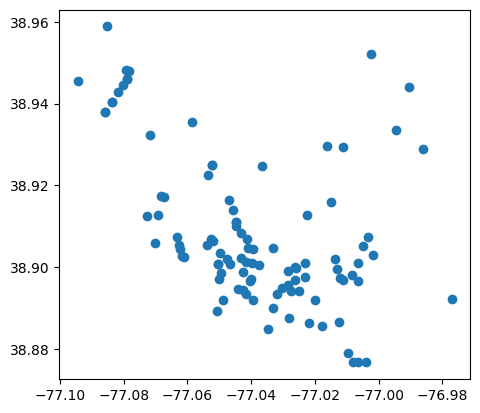

In [18]:
shuttle_gdf.plot()

In [59]:
shuttle_bus_stops_df.to_csv('clean_data/shuttle_bus_stops.csv', index=False)

In [60]:
shuttle_gdf.to_file('clean_data/shuttle_bus_stops.geojson', driver='GeoJSON')

## **2. Metro Bus Stop Dataset**

### Cleaning

***Purpose*** : WMATA Regional Bus Stops. The dataset includes bus stop identification, location, and inventory information.

In [19]:
metro_bus_stops_df.shape

(10044, 79)

In [20]:
metro_bus_stops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  10044 non-null  float64
 1   Y                  10044 non-null  float64
 2   EGIS_ID            10044 non-null  int64  
 3   REG_ID             10044 non-null  int64  
 4   BSTP_GEO_ID        10044 non-null  int64  
 5   BSTP_OPS_TCD       10044 non-null  object 
 6   BSTP_EFF_DATE      10044 non-null  object 
 7   BSTP_TCD           10044 non-null  object 
 8   AT_STR             10044 non-null  object 
 9   ON_STR             10044 non-null  object 
 10  BSTP_HDG           10044 non-null  int64  
 11  BSTP_POS_TCD       10044 non-null  object 
 12  BSTP_LDC           9768 non-null   object 
 13  BSTP_MSG_TEXT      10044 non-null  object 
 14  BSTP_LON           10044 non-null  float64
 15  BSTP_LAT           10044 non-null  float64
 16  BSTP_LAT_LON_TCD   481

In [21]:
# let's check for missing values in-depth
missing_info = get_missing_info(metro_bus_stops_df)
display(missing_info.sort_values("missing_val_ratio", ascending=False))

,data_type,missing_val,missing_val_ratio
SE_ANNO_CAD_DATA,float64,10044,100
MSTN_ID,object,9777,97
BSTP_LAT_LON_TCD,object,9563,95
SNOWPRIORITY,object,9497,95
BLOCKKEY,object,7025,70
ROUTEID,object,6874,68
MEASURE,float64,6874,68
OFFSET,float64,6874,68
BLOCKFACEKEY,object,6876,68
BSTP_LDC,object,276,3


Drop more than 95% null

In [22]:
metro_bus_stops_df.drop(columns=['SE_ANNO_CAD_DATA', 'MSTN_ID', 'BSTP_LAT_LON_TCD', 'SNOWPRIORITY'], inplace=True)

Drop IDs

In [23]:
metro_bus_stops_df = metro_bus_stops_df.drop(
    columns=[col for col in metro_bus_stops_df.columns if 'id' in col.lower()]
)

In [24]:
print_column_uniques(metro_bus_stops_df)


🟦 Column: X
-----------
🔹 Unique values count: 10044
X
-8.581259e+06    1
-8.574264e+06    1
-8.567197e+06    1
-8.562510e+06    1
-8.562399e+06    1
-8.585082e+06    1
-8.568020e+06    1
-8.552140e+06    1
-8.560235e+06    1
-8.590156e+06    1
Name: count, dtype: int64
... (more values not shown)

🟦 Column: Y
-----------
🔹 Unique values count: 10044
Y
4.715817e+06    1
4.715430e+06    1
4.701244e+06    1
4.708328e+06    1
4.728551e+06    1
4.705261e+06    1
4.694618e+06    1
4.708365e+06    1
4.691072e+06    1
4.738560e+06    1
Name: count, dtype: int64
... (more values not shown)

🟦 Column: BSTP_OPS_TCD
----------------------
🔹 Unique values count: 1
BSTP_OPS_TCD
PRS    10044
Name: count, dtype: int64

🟦 Column: BSTP_EFF_DATE
-----------------------
🔹 Unique values count: 1776
BSTP_EFF_DATE
1901/01/01 05:00:00+00    2777
1974/09/01 04:00:00+00     165
1985/06/30 04:00:00+00     140
1978/02/19 05:00:00+00     126
1978/12/03 05:00:00+00     116
1960/04/03 04:00:00+00     109
1962/02/1

🔹 Unique values count: 1
BSTP_OPS_TCD
PRS    10044
Name: count, dtype: int64

🔹 Unique values count: 1
CREATOR
JLAY    10044
Name: count, dtype: int64

🔹 Unique values count: 1
CREATED
2024/01/19 02:55:48+00    10044
Name: count, dtype: int64

🔹 Unique values count: 1
EDITOR
JLAY    10044
Name: count, dtype: int64

🔹 Unique values count: 1
EDITED
2024/01/19 02:55:48+00    10044
Name: count, dtype: int64

🔹 Unique values count: 1
BSTP_OPS_FTU_TCD
NON    10044
Name: count, dtype: int64

Columns with only 1 value will be dropped

In [25]:
metro_bus_stops_df.drop(columns=
                    ['BSTP_OPS_TCD', 'CREATED', 'CREATOR', 'EDITED', 'EDITOR', 'BSTP_OPS_FTU_TCD'],
                    inplace=True
                )

🔹 Unique values count: 2
BSTP_BRDG_STP
U    9986
Y      58

🔹 Unique values count: 2
METRO_ACCS_STP
U    10012
Y       32

Most of them U (unknown) so they will be dropped

In [26]:
metro_bus_stops_df.drop(columns=['BSTP_BRDG_STP', 'METRO_ACCS_STP'], inplace=True)

In [27]:
metro_bus_stops_df.shape

(10044, 57)

### turn to geo

In [28]:
metro_bus_stops_df['geometry'] = metro_bus_stops_df.apply(lambda row: Point(row['BSTP_LON'], row['BSTP_LAT']), axis=1)
metro_gdf = gpd.GeoDataFrame(metro_bus_stops_df, geometry='geometry', crs="EPSG:4326")

In [29]:
# Drop the LONGITUDE and LATITUDE columns --> not needed anymore
metro_gdf.drop(columns=["BSTP_LON","BSTP_LAT"], inplace=True)

In [ ]:
metro_bus_stops_df.to_csv('clean_data/metro_bus_stops.csv', index=False)
metro_gdf.to_file('clean_data/metro_bus_stops.geojson', driver='GeoJSON')

## **3. Capital Bikeshare Locations Dataset**


***Purpose*** :  The dataset contains locations and attributes of Capital Bikeshare sites. These are offer bikes to travel throughout the District for a fee.

### 🧹 Step 1: Let's starting by dropping totally useless columns:

A Few Notes :

- **STATION_STATUS**  
  As described in the dataset metadata, this column indicates whether a station is active or out of service.  
  However, this status is already captured by the `IS_RETURNING` column:
  - If `IS_RETURNING == FALSE` --> the station is out of service  
  - If `IS_RETURNING == TRUE` --> the station is active  
  Since STATION_STATUS is entirely null and redundant, it can be safely dropped.

- **GIS_ID**  
  Defined as the *"OCTO GIS sequential identifier"*. All values are missing (`NaN`).  
  --> Dropped.

- **REGION_ID**  
  Some values are missing. However, the metadata maps each ID to a known geographic region (e.g., DC, Arlington, Fairfax).  
  These missing values can potentially be filled via spatial join or inferred using latitude/longitude.  
  --> Kept for now.


In [30]:
# let's check for missing values in-depth
missing_info = get_missing_info(capital_bikeshare_locations_df)
display(missing_info.sort_values("missing_val_ratio", ascending=False))

,data_type,missing_val,missing_val_ratio
STATION_STATUS,float64,794,100
GIS_ID,float64,794,100
REGION_ID,float64,50,6


In [31]:
# First: Dropping all NULL coulmns
cols_100_nulls = [
    "STATION_STATUS", "GIS_ID"
]
capital_bikeshare_locations_df.drop(columns=cols_100_nulls, inplace=True)

In [32]:
print_column_uniques(capital_bikeshare_locations_df, max_values=50)


🟦 Column: X
-----------
🔹 Unique values count: 794
X
-8.577104e+06    1
-8.574966e+06    1
-8.582514e+06    1
-8.571275e+06    1
-8.589966e+06    1
-8.570798e+06    1
-8.609202e+06    1
-8.575185e+06    1
-8.576586e+06    1
-8.577174e+06    1
-8.576790e+06    1
-8.577547e+06    1
-8.576566e+06    1
-8.574050e+06    1
-8.581231e+06    1
-8.579538e+06    1
-8.578645e+06    1
-8.582766e+06    1
-8.580437e+06    1
-8.597438e+06    1
-8.580741e+06    1
-8.575636e+06    1
-8.573572e+06    1
-8.575436e+06    1
-8.582958e+06    1
-8.571958e+06    1
-8.574264e+06    1
-8.583844e+06    1
-8.573104e+06    1
-8.576988e+06    1
-8.572130e+06    1
-8.581054e+06    1
-8.574876e+06    1
-8.574126e+06    1
-8.569504e+06    1
-8.579313e+06    1
-8.611888e+06    1
-8.570887e+06    1
-8.578677e+06    1
-8.595252e+06    1
-8.570506e+06    1
-8.611603e+06    1
-8.575911e+06    1
-8.575909e+06    1
-8.572114e+06    1
-8.569210e+06    1
-8.582497e+06    1
-8.576368e+06    1
-8.576430e+06    1
-8.574260e+06  

In [33]:
matches = capital_bikeshare_locations_df[capital_bikeshare_locations_df["IS_RENTING"].str.contains("NO")]
matches

,X,Y,NAME,STATION_TYPE,STATION_ID,LAST_REPORTED,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,NUM_EBIKES_AVAILABLE,...,ELECTRIC_BIKE_SURCHARGE_WAIVER,EIGHTD_HAS_KEY_DISPENSER,CAPACITY,RENTAL_METHODS,REGION_ID,REGION_NAME,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,OBJECTID
163,-8.571013e+06,4.705110e+06,Pennsylvania Ave & 8th St SE,classic,08249e81-1f3f-11e7-bf6b-3863bb334450,1970/01/02 01:00:00+00,0,0,0,0,...,NO,NO,23,"KEY,CREDITCARD",42.0,DCA-CABI,38.884275,-76.994716,2025/05/05 20:27:29+00,261284191
478,-8.579649e+06,4.706586e+06,Wilson Blvd & Ft Myer Dr,classic,0824eb1b-1f3f-11e7-bf6b-3863bb334450,2025/05/05 20:17:36+00,12,0,0,0,...,NO,NO,19,"KEY,CREDITCARD",41.0,DCA-CABI,38.894600,-77.072305,2025/05/05 20:27:29+00,261284506
685,-8.569321e+06,4.712070e+06,18th & Monroe St NE,classic,0826547e-1f3f-11e7-bf6b-3863bb334450,2025/05/05 10:47:12+00,4,0,0,0,...,NO,NO,19,"KEY,CREDITCARD",42.0,DCA-CABI,38.932930,-76.979517,2025/05/05 20:27:30+00,261291753
735,-8.572230e+06,4.707700e+06,1st & K St NE,classic,b8b6903d-fabc-48aa-af9b-2c5fb29344b9,2025/05/05 20:26:34+00,0,0,0,0,...,NO,NO,17,"KEY,CREDITCARD",42.0,DCA-CABI,38.902386,-77.005649,2025/05/05 20:27:30+00,261291803


In [34]:
matches = capital_bikeshare_locations_df[capital_bikeshare_locations_df["IS_RETURNING"].str.contains("NO")]
matches

,X,Y,NAME,STATION_TYPE,STATION_ID,LAST_REPORTED,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,NUM_EBIKES_AVAILABLE,...,ELECTRIC_BIKE_SURCHARGE_WAIVER,EIGHTD_HAS_KEY_DISPENSER,CAPACITY,RENTAL_METHODS,REGION_ID,REGION_NAME,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,OBJECTID
163,-8.571013e+06,4.705110e+06,Pennsylvania Ave & 8th St SE,classic,08249e81-1f3f-11e7-bf6b-3863bb334450,1970/01/02 01:00:00+00,0,0,0,0,...,NO,NO,23,"KEY,CREDITCARD",42.0,DCA-CABI,38.884275,-76.994716,2025/05/05 20:27:29+00,261284191
478,-8.579649e+06,4.706586e+06,Wilson Blvd & Ft Myer Dr,classic,0824eb1b-1f3f-11e7-bf6b-3863bb334450,2025/05/05 20:17:36+00,12,0,0,0,...,NO,NO,19,"KEY,CREDITCARD",41.0,DCA-CABI,38.894600,-77.072305,2025/05/05 20:27:29+00,261284506
685,-8.569321e+06,4.712070e+06,18th & Monroe St NE,classic,0826547e-1f3f-11e7-bf6b-3863bb334450,2025/05/05 10:47:12+00,4,0,0,0,...,NO,NO,19,"KEY,CREDITCARD",42.0,DCA-CABI,38.932930,-76.979517,2025/05/05 20:27:30+00,261291753
735,-8.572230e+06,4.707700e+06,1st & K St NE,classic,b8b6903d-fabc-48aa-af9b-2c5fb29344b9,2025/05/05 20:26:34+00,0,0,0,0,...,NO,NO,17,"KEY,CREDITCARD",42.0,DCA-CABI,38.902386,-77.005649,2025/05/05 20:27:30+00,261291803


A Few Notes :

- **EIGHTD_HAS_KEY_DISPENSER**  & **ELECTRIC_BIKE_SURCHARGE_WAIVER**

All valuse of both of these column is "No". It offers no info --> Dropped

- **STATION_TYPE**  

All values are "classic" (not useful) --> Dropped

- **REGION_NAME**

All values are "DCA-CABI" (not useful) --> Dropped

- **OBJECTID**

Described as *Internal feature number* and *sequential unique whole numbers that are automatically generated* (Redundant and not useful since we already have station id) --> Dropped.

- **IOS**  & **ANDROID**

Constant values, not useful for analysis --> Dropped

- **RENTAL_METHODS**

Constant values, not useful for analysis --> Dropped

- **GIS_LAST_MOD_DTTM** & **LAST_REPORTED**

Last time and date the information was updated and the last time this station reported its status to the operator's backend. (not really useful for analysis could be used for freshness) --> Dropped

- **IS_RENTING**

We suspected that if **IS_RETURNING** is true (station is active), then so is **IS_RENTING**. after further inspection we found that the same 4 stations that are not returning are in fact not renting and thus, inactive. we opted to drop one of the columns and rename the other as STATION_STATUS as it captures all relevant info.


In [35]:
# Second: Dropping columns that are meaningless/useless
columns_to_drop = [
    "IOS", "ANDROID", "EIGHTD_HAS_KEY_DISPENSER", "ELECTRIC_BIKE_SURCHARGE_WAIVER",
    "STATION_TYPE", "GIS_LAST_MOD_DTTM", "LAST_REPORTED", "IS_RENTING", "OBJECTID", "REGION_NAME", "RENTAL_METHODS"
]
capital_bikeshare_locations_df.drop(columns=columns_to_drop, inplace=True)
capital_bikeshare_locations_df = capital_bikeshare_locations_df.rename(columns={"IS_RETURNING": "STATION_STATUS"})
capital_bikeshare_locations_df["STATION_STATUS"] = (
    capital_bikeshare_locations_df["STATION_STATUS"]
    .str.replace("YES", "ACTIVE")
    .str.replace("NO", "INACTIVE")
)
capital_bikeshare_locations_df.head()

,X,Y,NAME,STATION_ID,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,NUM_EBIKES_AVAILABLE,NUM_BIKES_DISABLED,IS_INSTALLED,STATION_STATUS,HAS_KIOSK,CAPACITY,REGION_ID,LATITUDE,LONGITUDE
0,-8.577104e+06,4.705679e+06,Lincoln Memorial,08254284-1f3f-11e7-bf6b-3863bb334450,17,0,8,0,0,YES,ACTIVE,YES,25,42.0,38.888255,-77.049437
1,-8.609481e+06,4.714716e+06,W&OD Trail/Sunset Hills Rd & Isaac Newton Sq,08263fbd-1f3f-11e7-bf6b-3863bb334450,15,0,3,0,1,YES,ACTIVE,YES,19,104.0,38.951419,-77.340281
2,-8.575867e+06,4.705657e+06,17th St & Independence Ave SW,082623bf-1f3f-11e7-bf6b-3863bb334450,10,0,6,4,1,YES,ACTIVE,YES,19,42.0,38.888097,-77.038325
3,-8.574188e+06,4.706622e+06,8th & D St NW,08256ac9-1f3f-11e7-bf6b-3863bb334450,0,0,24,0,0,YES,ACTIVE,NO,24,42.0,38.894851,-77.023240
4,-8.567161e+06,4.706864e+06,Anacostia Ave & Benning Rd NE / River Terrace,082518eb-1f3f-11e7-bf6b-3863bb334450,4,0,10,0,1,YES,ACTIVE,YES,15,42.0,38.896544,-76.960120


### Finally, let's turn this DataFrame into a GeoDataFrame

In [36]:
capital_bikeshare_locations_df['geometry'] = capital_bikeshare_locations_df.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
capital_gdf = gpd.GeoDataFrame(capital_bikeshare_locations_df, geometry='geometry', crs="EPSG:4326")

<Axes: >

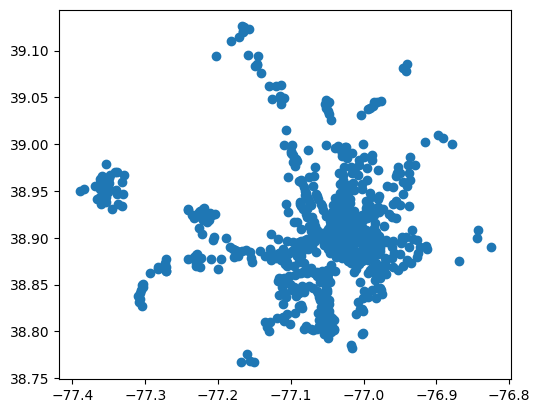

In [37]:
capital_gdf.plot()

In [38]:
# Drop the LONGITUDE and LATITUDE columns --> not needed anymore
capital_gdf.drop(columns=["LONGITUDE","LATITUDE"], inplace=True)

In [63]:
capital_bikeshare_locations_df.to_csv('clean_data/capital_bikeshare.csv', index=False)
capital_gdf.to_file('clean_data/capital_bikeshare.geojson', driver='GeoJSON')

## **4. Residential And Visitor Parking Zones Dataset**


***Purpose*** : The DDOT Residential/Visitor Parking Zone layer delineates the residential and visitor parking zone boundaries in the District.

In [7]:
residential_and_visitor_parking_zones_gdf.head(10)

,NAME,RPP_ZONE,ANC_ID,WEB_URL,GIS_ID,SHAPE_LENG,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,SHAPEAREA,SHAPELEN,geometry
0,ANC 4A,4,4A,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_17,19149.358478,None,None,None,None,1,0,0,"POLYGON ((-77.03331 38.98999, -77.03332 38.99,..."
1,ANC 3G,3,3G,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_16,13274.053932,None,None,None,None,2,0,0,"POLYGON ((-77.05161 38.98615, -77.05181 38.986..."
2,ANC 4B,4,4B,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_10,10937.574323,None,None,None,None,3,0,0,"POLYGON ((-76.99908 38.96328, -76.99909 38.963..."
3,ANC 3F,3,3F,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_15,11804.927060,None,None,None,None,4,0,0,"POLYGON ((-77.04702 38.96038, -77.04722 38.960..."
4,ANC 4C,4,4C,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_7,9774.918003,None,None,None,None,5,0,0,"POLYGON ((-77.02803 38.95622, -77.02804 38.956..."
5,ANC 4D,4,4D,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_33,6644.071961,None,None,None,None,6,0,0,"POLYGON ((-77.01923 38.9576, -77.01923 38.9576..."
6,ANC 5A,5,5A,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_34,12743.869490,None,None,None,None,7,0,0,"POLYGON ((-76.99143 38.9573, -76.99143 38.9573..."
7,ANC 5B,5,5B,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_36,11542.810028,None,None,None,None,8,0,0,"POLYGON ((-76.98239 38.95024, -76.98239 38.950..."
8,ANC 3D,3,3D,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_14,16117.574199,None,None,None,None,9,0,0,"POLYGON ((-77.1011 38.94854, -77.10113 38.9485..."
9,ANC 3C,3,3C,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_13,11933.421314,None,None,None,None,10,0,0,"POLYGON ((-77.07789 38.94317, -77.07804 38.943..."


In [ ]:
# let's check for missing values in-depth
missing_info = get_missing_info(residential_and_visitor_parking_zones_gdf)
display(missing_info.sort_values("missing_val_ratio", ascending=False))

### 🧹 Step 1: Let's starting by dropping totally useless columns

In [9]:
cols_100_nulls = [
    "CREATOR", "CREATED", "EDITOR", "EDITED"
]
residential_and_visitor_parking_zones_gdf.drop(columns=cols_100_nulls,inplace=True)

In [10]:
residential_and_visitor_parking_zones_gdf.head()

,NAME,RPP_ZONE,ANC_ID,WEB_URL,GIS_ID,SHAPE_LENG,OBJECTID,SHAPEAREA,SHAPELEN,geometry
0,ANC 4A,4,4A,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_17,19149.358478,1,0,0,"POLYGON ((-77.03331 38.98999, -77.03332 38.99,..."
1,ANC 3G,3,3G,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_16,13274.053932,2,0,0,"POLYGON ((-77.05161 38.98615, -77.05181 38.986..."
2,ANC 4B,4,4B,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_10,10937.574323,3,0,0,"POLYGON ((-76.99908 38.96328, -76.99909 38.963..."
3,ANC 3F,3,3F,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_15,11804.927060,4,0,0,"POLYGON ((-77.04702 38.96038, -77.04722 38.960..."
4,ANC 4C,4,4C,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_7,9774.918003,5,0,0,"POLYGON ((-77.02803 38.95622, -77.02804 38.956..."


In [11]:
print_column_uniques(residential_and_visitor_parking_zones_gdf,max_values=40)

NameError: name 'print_column_uniques' is not defined

A Few Notes :

- **SHAPEAREA**  & **SHAPELEN**

All valuse of both of these column is 0. It offers no info --> Dropped

- **OBJECTID**  & **GIS_ID**

incremental ID column (not useful) --> Dropped

- **WEB_URL**

URL of ANC site (not useful) --> Dropped

- **NAME**

Holds the same values as ANC_ID only with the name "ANC" (redundant) --> Dropped.

In [12]:
columns_to_drop = [
    "NAME", "WEB_URL", "GIS_ID", "OBJECTID", "SHAPEAREA","SHAPELEN"
]
residential_and_visitor_parking_zones_gdf.drop(columns=columns_to_drop, inplace=True)

In [13]:
residential_and_visitor_parking_zones_gdf.head()

,RPP_ZONE,ANC_ID,SHAPE_LENG,geometry
0,4,4A,19149.358478,"POLYGON ((-77.03331 38.98999, -77.03332 38.99,..."
1,3,3G,13274.053932,"POLYGON ((-77.05161 38.98615, -77.05181 38.986..."
2,4,4B,10937.574323,"POLYGON ((-76.99908 38.96328, -76.99909 38.963..."
3,3,3F,11804.927060,"POLYGON ((-77.04702 38.96038, -77.04722 38.960..."
4,4,4C,9774.918003,"POLYGON ((-77.02803 38.95622, -77.02804 38.956..."


In [14]:
residential_and_visitor_parking_zones_gdf.to_file('clean_data/residential.geojson', driver='GeoJSON')

## **5. DDOT Central Business Distric**

this dataset only has one row which is info about the central business district, we will be dropping all columns besides **`geometry`** since it's the one we're interested in.

In [15]:
DDOT_central_business_district_gdf.head()

,OBJECTID,ID,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,1,0,DDOT_CBD_1,{88E0BE6C-77A4-4C9B-96DA-39C3D223AA41},None,None,None,None,0,0,"POLYGON ((-77.05028 38.91194, -77.05029 38.911..."


In [16]:
DDOT_central_business_district_gdf = DDOT_central_business_district_gdf['geometry']

In [17]:
display(DDOT_central_business_district_gdf.head())

0    POLYGON ((-77.05028 38.91194, -77.05029 38.911...
Name: geometry, dtype: geometry

In [18]:
DDOT_central_business_district_gdf.to_file('clean_data/DDOT.geojson', driver='GeoJSON')

## **6. Stations**

Exploring...

In [50]:
print_column_uniques(stations_df)


🟦 Column: id
------------
🔹 Unique values count: 804
id
31133    3
32429    2
31528    2
31949    2
31225    2
31045    2
31699    2
31726    2
31339    2
31380    2
Name: count, dtype: int64
... (more values not shown)

🟦 Column: name
--------------
🔹 Unique values count: 820
name
Randle Circle & Minnesota Ave SE       2
9th St & Pennsylvania Ave NW           1
National Airport                       1
Columbia Pike & S George Mason Dr      1
Wilson Blvd & N Troy St                1
Wilson Blvd & N Vermont St             1
Wheeler Ave & S. Floyd St.             1
N. Beauregard St. & Berkley St.        1
Mt Vernon Trail & S. Washington St.    1
Eisenhower Ave & Ike Dr                1
Name: count, dtype: int64
... (more values not shown)


Droping duplicated values in 'id' then 'name'

In [51]:
stations_df.drop_duplicates(subset=['id'], inplace=True)
stations_df.drop_duplicates(subset=['name'], inplace=True)

Now all values should be unique

In [52]:
print_column_uniques(stations_df)


🟦 Column: id
------------
🔹 Unique values count: 803
id
30200    1
31937    1
31926    1
31927    1
31928    1
31929    1
31930    1
31931    1
31932    1
31933    1
Name: count, dtype: int64
... (more values not shown)

🟦 Column: name
--------------
🔹 Unique values count: 803
name
9th St & Pennsylvania Ave NW            1
Arlington Blvd & Ft Myer Dr             1
Wilson Blvd & N Vermont St              1
Wheeler Ave & S. Floyd St.              1
N. Beauregard St. & Berkley St.         1
Mt Vernon Trail & S. Washington St.     1
Eisenhower Ave & Ike Dr                 1
N Pitt St & Montgomery St               1
Van Dorn Metro                          1
Duke St & Strand (Robinson Terminal)    1
Name: count, dtype: int64
... (more values not shown)


In [67]:
stations_df.to_csv('clean_data/stations.csv', index=False)

## **7. Daily Rent**

In [53]:
print_column_uniques(daily_rent_sampled_df)


🟦 Column: ride_id
-----------------
🔹 Unique values count: 2018430
ride_id
D4E6AF7A36727D13    2
F5F3789644A8F3D5    2
AEFFDCC6F26BE922    2
071841FB4E2FFDBB    2
FE68E0DF3651E5EA    2
1BC5562F452F6D9C    2
9DC0BCD54F8ECC60    2
F1D07F2AC9ABD87E    2
8B1BADBEC92322B0    2
B9116456E9C54F4F    2
Name: count, dtype: int64
... (more values not shown)

🟦 Column: rideable_type
-----------------------
🔹 Unique values count: 2
rideable_type
electric_bike    1123975
classic_bike      894481
Name: count, dtype: int64

🟦 Column: started_at
--------------------
🔹 Unique values count: 1989352
started_at
2024-05-06 17:13:26    5
2024-05-07 16:28:29    5
2024-03-24 15:27:43    5
2024-02-07 17:43:53    4
2024-05-07 16:04:53    4
2024-05-28 18:30:37    4
2024-05-29 18:20:54    4
2024-04-11 18:11:14    4
2024-05-13 17:26:46    4
2024-03-24 17:55:39    4
Name: count, dtype: int64
... (more values not shown)

🟦 Column: ended_at
------------------
🔹 Unique values count: 1989525
ended_at
2024-09-04 10:28:0

In [54]:
get_missing_info(daily_rent_sampled_df)

,data_type,missing_val,missing_val_ratio
start_station_name,object,393290,19
start_station_id,object,393290,19
end_station_name,object,408636,20
end_station_id,object,409167,20
end_lat,float64,1552,0
end_lng,float64,1552,0


### **Pipeline**

In [55]:
def clean_daily_rent_data(daily_rent_df: pd.DataFrame, stations_df: pd.DataFrame, threshold: float = 0.01) -> pd.DataFrame:
    daily_rent_df = daily_rent_df.copy()
    # Step 1: Drop rows where end coordinates are missing
    daily_rent_df.dropna(subset=['end_lat', 'end_lng'], inplace=True)

    # Step 2: Fill missing IDs and names using mapping
    name_to_id = dict(zip(stations_df['name'], stations_df['id']))
    id_to_name = dict(zip(stations_df['id'], stations_df['name']))

    daily_rent_df['start_station_id'] = pd.to_numeric(daily_rent_df['start_station_id'], errors='coerce').astype('Int64')
    daily_rent_df['end_station_id'] = pd.to_numeric(daily_rent_df['end_station_id'], errors='coerce').astype('Int64')


    daily_rent_df['start_station_id'] = daily_rent_df['start_station_id'].fillna(
        daily_rent_df['start_station_name'].map(name_to_id)
    )
    daily_rent_df['end_station_id'] = daily_rent_df['end_station_id'].fillna(
        daily_rent_df['end_station_name'].map(name_to_id)
    )
    daily_rent_df['start_station_name'] = daily_rent_df['start_station_name'].fillna(
        daily_rent_df['start_station_id'].map(id_to_name)
    )
    daily_rent_df['end_station_name'] = daily_rent_df['end_station_name'].fillna(
        daily_rent_df['end_station_id'].map(id_to_name)
    )

    # Step 3: Use KDTree to fill missing start_station_id
    daily_rent_df = fill_missing_station_id_with_kdtree(
        df=daily_rent_df,
        id_col='start_station_id',
        lat_col='start_lat',
        lng_col='start_lng',
        threshold=threshold
    )

    # Step 4: Use KDTree to fill missing end_station_id
    daily_rent_df = fill_missing_station_id_with_kdtree(
        df=daily_rent_df,
        id_col='end_station_id',
        lat_col='end_lat',
        lng_col='end_lng',
        threshold=threshold
    )

    # Step 2 (again): Fill names again if new IDs have been added
    daily_rent_df['start_station_name'] = daily_rent_df['start_station_name'].fillna(
        daily_rent_df['start_station_id'].map(id_to_name)
    )
    daily_rent_df['end_station_name'] = daily_rent_df['end_station_name'].fillna(
        daily_rent_df['end_station_id'].map(id_to_name)
    )

    # Step 5: Drop the rest null rows (now it's less that 1%)
    daily_rent_df.dropna(how='any', inplace=True)

    # Step 6: Replace rideable_type column with electric_bike column which have binary values
    daily_rent_df['electric_bike'] = daily_rent_df['rideable_type'] == 'electric_bike'
    daily_rent_df.drop(columns=['rideable_type'], inplace=True)

    # Step 7: Replace member_casual column with member column which have binary values
    daily_rent_df['member'] = daily_rent_df['member_casual'] == 'member'
    daily_rent_df.drop(columns=['member_casual'], inplace=True)

    return daily_rent_df


def fill_missing_station_id_with_kdtree(df: pd.DataFrame, id_col: str, lat_col: str, lng_col: str, threshold: float) -> pd.DataFrame:
    known = df.dropna(subset=[id_col]).copy()
    missing = df[df[id_col].isna()].copy()

    if known.empty or missing.empty:
        return df

    coords_known = known[[lat_col, lng_col]].to_numpy()
    station_ids = known[id_col].to_numpy()
    tree = KDTree(coords_known)

    coords_missing = missing[[lat_col, lng_col]].to_numpy()
    dists, idxs = tree.query(coords_missing, k=1)

    nearest_ids = np.where(dists <= threshold, station_ids[idxs], np.nan)

    df.loc[missing.index, id_col] = nearest_ids
    return df


### Result

In [56]:
# Call the cleaning function
cleaned_daily_rent_df = clean_daily_rent_data(daily_rent_sampled_df, stations_df)

In [57]:
print(cleaned_daily_rent_df.shape)
print(cleaned_daily_rent_df.columns)

(2007101, 13)
Index(['ride_id', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'electric_bike', 'member'],
      dtype='object')


In [68]:
get_missing_info(cleaned_daily_rent_df)

,data_type,missing_val,missing_val_ratio


In [70]:
cleaned_daily_rent_df.to_parquet('clean_data/daily_rent_sample.parquet', index=False)

In [69]:
cleaned_daily_rent_df.to_csv('clean_data/daily_rent_sample.csv', index=False)

In [5]:
daily_rent_sampled_df.columns

Index(['ride_id', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'electric_bike', 'member'],
      dtype='object')

### Turn to geo

#### Start

In [6]:
daily_rent_sampled_df['geometry'] = daily_rent_sampled_df.apply(lambda row: Point(row['start_lng'], row['start_lat']), axis=1)
start_daily_rent_gdf = gpd.GeoDataFrame(daily_rent_sampled_df, geometry='geometry', crs="EPSG:4326")

In [7]:
# Drop the LONGITUDE and LATITUDE columns --> not needed anymore
start_daily_rent_gdf.drop(columns=["start_lng","start_lat"], inplace=True)

In [8]:
start_daily_rent_gdf.to_parquet("clean_data/start_daily_rent_gdf.parquet", index=False)

#### End

In [9]:
daily_rent_sampled_df.drop(columns=['geometry'], inplace=True)

In [10]:
daily_rent_sampled_df['geometry'] = daily_rent_sampled_df.apply(lambda row: Point(row['end_lng'], row['end_lat']), axis=1)
end_daily_rent_gdf = gpd.GeoDataFrame(daily_rent_sampled_df, geometry='geometry', crs="EPSG:4326")

In [11]:
# Drop the LONGITUDE and LATITUDE columns --> not needed anymore
end_daily_rent_gdf.drop(columns=["end_lng","end_lat"], inplace=True)

In [12]:
end_daily_rent_gdf.to_parquet("clean_data/end_daily_rent_gdf.parquet", index=False)

# 1.2 Let's Join Data!

- We'll start by joining Capital Bikeshare Locations with Residential And Visitor Parking Zones.
- We will be trying different ways of spatial joining and comparing them

In [ ]:
# Let's ensure both layers use the same projection first
print("Capital Bikeshare Locations: ", capital_gdf.crs)
print("Residential And Visitor Parking Zones: ", residential_and_visitor_parking_zones_gdf.crs)

Capital Bikeshare Locations:  EPSG:4326
Residential And Visitor Parking Zones:  EPSG:4326


### 1. LEFT JOIN --> "Which zone each bike station is in (if any)?"
📌 "I want to keep all stations, even if they aren’t in a zone."

In [ ]:
# Keep all rows from the left GeoDataFrame (e.g. points), and add matching rows from the right (e.g. polygons).
left_joined = capital_gdf.sjoin(residential_and_visitor_parking_zones_gdf, how='left')

left_joined.explore()

In [ ]:
missing_info = get_missing_info(left_joined)
display(missing_info.sort_values("missing_val_ratio", ascending=False))

,data_type,missing_val,missing_val_ratio
index_right,float64,391,49
ANC_ID,object,391,49
RPP_ZONE,float64,391,49
SHAPE_LENG,float64,391,49
REGION_ID,float64,50,6


we can see that half of the stations aren't within a residential zone.

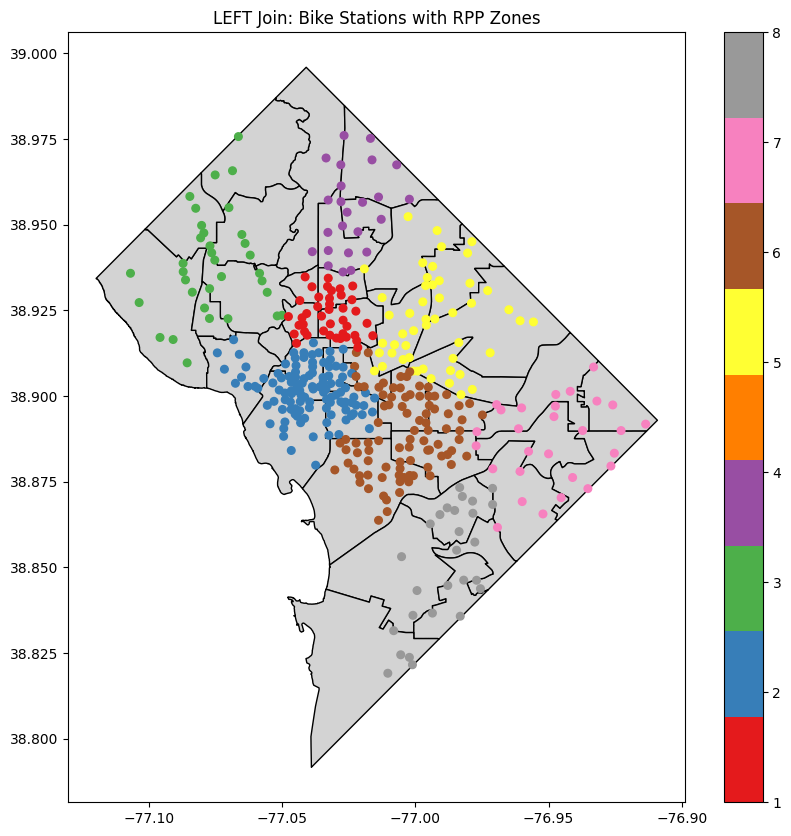

In [ ]:
import matplotlib.pyplot as plt
ax = residential_and_visitor_parking_zones_gdf.plot(color='lightgray', edgecolor='black', figsize=(10, 10))
left_joined.plot(ax=ax, column='RPP_ZONE', cmap='Set1', legend=True, markersize=30)
plt.title("LEFT Join: Bike Stations with RPP Zones")
plt.show()

### 2. RIGHT JOIN → "Which zones contain bike stations?"
📌 "I want all zones, even if no bike station is in them."

<Axes: >

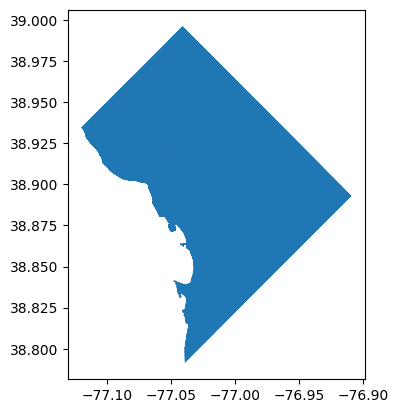

In [ ]:
# Keep all rows from the right GeoDataFrame (e.g. polygons), and add matching rows from the left (e.g. points).
right_joined = capital_gdf.sjoin(residential_and_visitor_parking_zones_gdf, how='right')

right_joined.plot()

In [ ]:
right_joined.shape

(404, 19)

In [ ]:
missing_info = get_missing_info(right_joined)
display(missing_info.sort_values("missing_val_ratio", ascending=False))

,data_type,missing_val,missing_val_ratio
REGION_ID,float64,20,5
X,float64,1,0
index_left,float64,1,0
NAME,object,1,0
STATION_ID,object,1,0
NUM_DOCKS_AVAILABLE,float64,1,0
Y,float64,1,0
NUM_DOCKS_DISABLED,float64,1,0
NUM_BIKES_AVAILABLE,float64,1,0
NUM_BIKES_DISABLED,float64,1,0


In [ ]:
right_joined["STATION_STATUS"].describe()

count        403
unique         2
top       ACTIVE
freq         400
Name: STATION_STATUS, dtype: object

<Axes: >

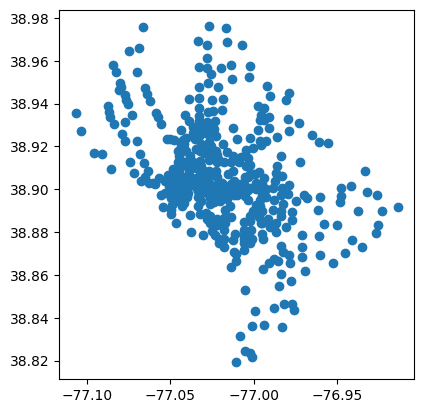

In [ ]:
# Keep all rows from the right GeoDataFrame (e.g. polygons), and add matching rows from the left (e.g. points).
inner_joined = capital_gdf.sjoin(residential_and_visitor_parking_zones_gdf, how='inner')

inner_joined.plot()

In [ ]:
print("Shuttle Bus Stop shape and info", shuttle_gdf.shape)
shuttle_gdf.info()
print("Capital Bikeshare Locations shape and info", capital_gdf.shape)
capital_gdf.info()
print("inner joined shape and info", inner_joined.shape)
inner_joined.info()
print("left joined shape and info", left_joined.shape)
left_joined.info()
print("right joined shape and info", right_joined.shape)
right_joined.info()

Shuttle Bus Stop shape and info (102, 18)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   X                      102 non-null    float64 
 1   Y                      102 non-null    float64 
 2   COMPANY                102 non-null    object  
 3   ADDRESS                102 non-null    object  
 4   ATTRACTION             102 non-null    object  
 5   CROSSROADS             102 non-null    object  
 6   METERS                 102 non-null    object  
 7   METRO_BUS_ZONE         102 non-null    object  
 8   METRO_STOP_ID          102 non-null    object  
 9   OTHER                  102 non-null    object  
 10  NUM_SHARED_OPER        102 non-null    int64   
 11  RUSH_HOUR_RESTR        102 non-null    object  
 12  LZ_HOTEL_OR_COMM       102 non-null    object  
 13  SPACE_LOC_ON_BLOCK     102 non-null    object

# 1.3 Feature Engineering

## 4. Capacity -> (small, medium, large)

In [20]:
capital_bikeshare_locations_df.shape

(794, 17)

In [19]:
capital_bikeshare_locations_df['CAPACITY'].describe()

count    794.000000
mean      17.234257
std        5.712581
min        8.000000
25%       15.000000
50%       15.000000
75%       19.000000
max       55.000000
Name: CAPACITY, dtype: float64

In [ ]:
mean = capital_bikeshare_locations_df['CAPACITY'].mean()
std  = capital_bikeshare_locations_df['CAPACITY'].std()
bins = [0, mean - std, mean + std, float('inf')]
labels = ['Small', 'Medium', 'Large']
capital_bikeshare_locations_df['CAPACITY_CAT'] = pd.cut(
    capital_bikeshare_locations_df['CAPACITY'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [24]:
capital_bikeshare_locations_df['CAPACITY_CAT'].value_counts()

CAPACITY_CAT
Medium    597
Large     109
Small      88
Name: count, dtype: int64

## 5. Find distant to nearest bus stop

### distant (start station -> nearest shuttle bus stop) in meters

In [7]:
#Reproject GeoDataFrames to (EPSG:3857), which uses metres
start_daily_gdf = start_daily_gdf.to_crs(epsg=3857)
end_daily_gdf = end_daily_gdf.to_crs(epsg=3857)
shuttle_bus_stops_gdf = shuttle_bus_stops_gdf.to_crs(epsg=3857)
metro_bus_stops_gdf = metro_bus_stops_gdf.to_crs(epsg=3857)

In [8]:
# we only need geometry from the stops
shuttle_geo = shuttle_bus_stops_gdf[['geometry']]

joined1 = gpd.sjoin_nearest(
    start_daily_gdf,
    shuttle_geo,
    how='left',                  # keep every bike point
    distance_col='start_to_shuttle'  # new column with the computed distance
)


In [9]:
nearest = joined1[['start_to_shuttle']]

In [10]:
nearest

,start_to_shuttle
0,407.768240
1,235.363713
2,107.814195
3,788.883792
4,851.081535
...,...
2007097,1943.828202
2007098,394.582362
2007098,394.582362
2007099,54.507913


### distant (start station -> nearest metro bus stop) in meters

In [11]:
# we only need geometry from the stops
metro_geo = metro_bus_stops_gdf[['geometry']]

joined = gpd.sjoin_nearest(
    start_daily_gdf,
    metro_geo,
    how='left',                  # keep every bike point
    distance_col='start_to_metro'  # new column with the computed distance
)

In [13]:
nearest['start_to_metro'] = joined['start_to_metro']

C:\Users\Reham\AppData\Local\Temp\ipykernel_18716\3100070567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest['start_to_metro'] = joined['start_to_metro']


In [14]:
nearest

,start_to_shuttle,start_to_metro
0,407.768240,54.412955
1,235.363713,67.686104
2,107.814195,320.211421
3,788.883792,1143.991163
4,851.081535,203.529294
...,...,...
2007097,1943.828202,72.409343
2007098,394.582362,326.530657
2007098,394.582362,326.530657
2007099,54.507913,66.962046


### distant (end station -> nearest shuttle bus stop) in meters

In [15]:
joined_3 = gpd.sjoin_nearest(
    end_daily_gdf,
    shuttle_geo,
    how='left',                  # keep every bike point
    distance_col='end_to_shuttle'  # new column with the computed distance
)


### distant (end station -> nearest metro bus stop) in meters

In [ ]:
joined_4 = gpd.sjoin_nearest(
    end_daily_gdf,
    metro_geo,
    how='left',                  # keep every bike point
    distance_col='end_to_metro'  # new column with the computed distance
)


## 10.

In [27]:
weather_df['conditions'].value_counts()

conditions
Partially cloudy                197
Rain, Partially cloudy           74
Rain, Overcast                   59
Clear                            24
Overcast                          6
Snow, Rain, Overcast              3
Snow, Rain, Partially cloudy      2
Snow, Partially cloudy            1
Name: count, dtype: int64

In [29]:
weather_df['icon'].value_counts()

icon
partly-cloudy-day    196
rain                 131
clear-day             24
snow                   8
cloudy                 6
wind                   1
Name: count, dtype: int64

In [30]:
weather_df[weather_df['icon'] == 'wind']

,name,datetime,tempmax,tempmin,temp,humidity,windspeed,windspeedmax,windspeedmean,windspeedmin,cloudcover,sunrise,sunset,moonphase,conditions,description,icon
339,"Washington,DC,USA",2024-12-05,7.8,-1.2,3.8,37.3,50.8,50.8,28.5,8.4,46.7,2024-12-05T07:12:07,2024-12-05T16:45:52,0.16,Partially cloudy,Clearing in the afternoon.,wind


In [31]:
def simplify_condition(condition):
    condition = condition.lower()
    if 'rain' in condition or 'snow' in condition:
        return 'rainy'
    elif 'clear' in condition:
        return 'sunny'
    else:
        return 'cloudy'


In [32]:
weather_df['weather_condition'] = weather_df['icon'].apply(simplify_condition)

In [33]:
weather_df['weather_condition'].value_counts()

weather_condition
cloudy    203
rainy     139
sunny      24
Name: count, dtype: int64

# Done!